In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

通过先生成均匀分布的随机数，再通过逆变换的方法，将随机数映射到非均匀分布上

接下来，我们分成离散和连续两种情形进行讨论

### 离散非均匀随机数生成

(array([144., 108., 152., 147., 149.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

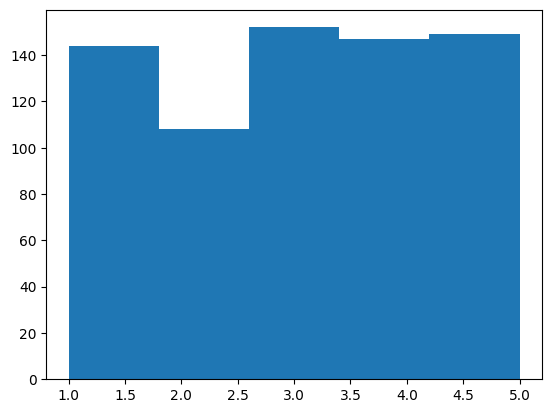

In [7]:
def DUG(m=5):
    '''
    生成取值为{1,2,3,4,……,m}的离散均匀分布 
    '''
    while True:
        yield math.ceil(random.uniform(0,m))
    
maker=DUG()
m=[]

#抽样700个，进行检验
for _ in range(700):
    m.append(next(maker))
plt.hist(m,5)


(array([2073.,  933.,  495.,  255.,   71.,   82.,   51.,   22.,   15.,
           3.]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <BarContainer object of 10 artists>)

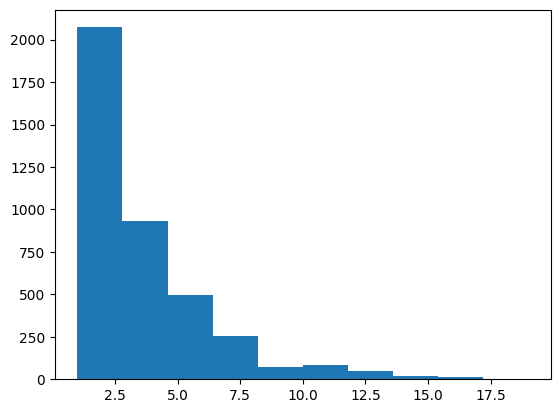

In [12]:
def DGG(p=0.3):
    '''生成符合几何分布的随机数,p表示成功的概率 '''
    while True:
        yield math.ceil(math.log(random.uniform(0,1))/math.log(1-p))

maker=DGG()
m=[]

#抽样4000个，进行检验
for _ in range(4000):
    m.append(next(maker))
plt.hist(m,10)

In [35]:
def BG(p=0.5,n=10):
    '''
    根据递推公式生成符合二项分布B(n,p)的随机数
    待改进,这种生成方法太过低效 
    '''
    while True:
        u=random.uniform(0,1)
        k=0
        cc=p/(1-p)
        a=(1-p)**n
        F=a
        while u>a:
            a*=cc*(n-k)/(k+1)
            F+=a
            k+=1
        yield k

    
maker=BG()
print(next(maker))

5


In [ ]:
def BG_2(p=0.5,n=10):
    '''先生成n个二点分布,再加起来生成二项分布 '''

In [67]:
def PoissonG(lam=0.7):
    '''
    生成符合泊松分布P(lamda)的随机数
    过于低效,待改进 
    '''
    while True:
        u=random.uniform(0,1)
        p=math.exp(-lam)
        F=p
        k=0
        while u>F:
            p*=lam/(k+1)
            F+=p
            k+=1
        yield k

maker=PoissonG()
print(next(maker))
    

2


### 连续非均匀随机数生成

(array([  2.,   3.,   8.,  12.,  24.,  42.,  82., 132., 165., 235., 318.,
        436., 492., 574., 605., 618., 517., 459., 374., 320., 206., 166.,
         85.,  55.,  31.,  17.,  11.,   5.,   4.,   2.]),
 array([-3.69491546, -3.44526085, -3.19560625, -2.94595165, -2.69629704,
        -2.44664244, -2.19698784, -1.94733323, -1.69767863, -1.44802403,
        -1.19836942, -0.94871482, -0.69906022, -0.44940561, -0.19975101,
         0.04990359,  0.2995582 ,  0.5492128 ,  0.7988674 ,  1.04852201,
         1.29817661,  1.54783121,  1.79748581,  2.04714042,  2.29679502,
         2.54644962,  2.79610423,  3.04575883,  3.29541343,  3.54506804,
         3.79472264]),
 <BarContainer object of 30 artists>)

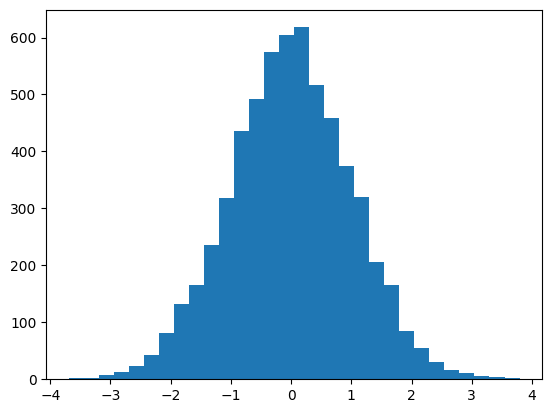

In [3]:
def GCG(u=0,d=1):
    '''
    使用Box-Muller算法生成符合N(u,d**2)的正态分布的随机数 
    '''
    while True:
        a=random.uniform(0,1)
        b=random.uniform(0,1)
        
        x1=math.sqrt((-2)*math.log(a))*math.cos(2*math.pi*b)
        x2=math.sqrt((-2)*math.log(a))*math.sin(2*math.pi*b)
        
        #从标准正态函数转化为我们想要的正态分布
        y1=x1*d**(0.5)+u
        y2=x2*d**(0.5)+u

        yield y1,y2

maker=GCG()
m=[]
for _ in range(3000):
    a,b=next(maker)
    m.append(a)
    m.append(b)
plt.hist(m,30)


(array([670., 552., 408., 303., 240., 195., 147., 125.,  85.,  60.,  45.,
         45.,  35.,  19.,  17.,  14.,   9.,   8.,   5.,   4.,   2.,   4.,
          3.,   0.,   2.,   2.,   0.,   0.,   0.,   1.]),
 array([7.85092597e-05, 8.89537308e-02, 1.77828952e-01, 2.66704174e-01,
        3.55579395e-01, 4.44454617e-01, 5.33329839e-01, 6.22205060e-01,
        7.11080282e-01, 7.99955503e-01, 8.88830725e-01, 9.77705946e-01,
        1.06658117e+00, 1.15545639e+00, 1.24433161e+00, 1.33320683e+00,
        1.42208205e+00, 1.51095728e+00, 1.59983250e+00, 1.68870772e+00,
        1.77758294e+00, 1.86645816e+00, 1.95533338e+00, 2.04420861e+00,
        2.13308383e+00, 2.22195905e+00, 2.31083427e+00, 2.39970949e+00,
        2.48858471e+00, 2.57745993e+00, 2.66633516e+00]),
 <BarContainer object of 30 artists>)

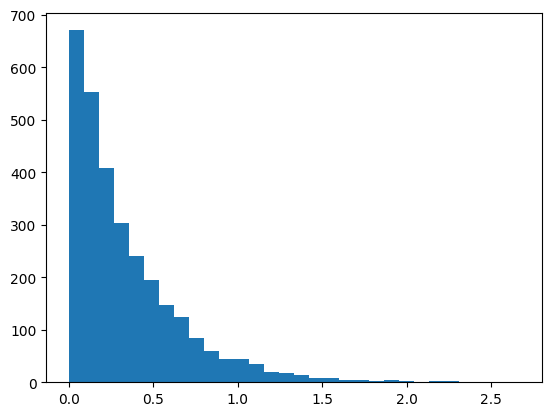

In [4]:
def ExpG(lam=3):
    '''生成符合exp(lamda)分布的随机数 '''
    while True:
        a=random.uniform(0,1)
        yield -math.log(a)/lam

maker=ExpG()
m=[]
for _ in range(3000):
    a=next(maker)
    m.append(a)
plt.hist(m,30)